In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок

In [6]:
# Блок(и) обучения и поверки модели

In [7]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
df_train['total acidity'] = df_train['fixed acidity'] + df_train['volatile acidity']
df_train['mega total acidity'] = df_train['fixed acidity'] + df_train['volatile acidity']+ df_train ['citric acid']
df_train['sulphates/fixed acidity volatile'] = df_train['sulphates']/df_train['fixed acidity']
df_train['сумма хим примесей'] = df_train['fixed acidity'] + df_train['volatile acidity']+df_train['citric acid'] + df_train['residual sugar'] +df_train['chlorides'] + df_train['free sulfur dioxide']+df_train['total sulfur dioxide'] + df_train['sulphates']
df_test['total acidity'] = df_test['fixed acidity'] + df_test['volatile acidity']
df_test['mega total acidity'] = df_test['fixed acidity'] + df_test['volatile acidity']+ df_test ['citric acid']
df_test['sulphates/fixed acidity volatile'] = df_test['sulphates']/df_test['fixed acidity']
df_test['сумма хим примесей'] = df_test['fixed acidity'] + df_test['volatile acidity']+df_test['citric acid'] + df_test['residual sugar'] +df_test['chlorides'] + df_test['free sulfur dioxide']+df_test['total sulfur dioxide'] + df_train['sulphates']
df_train['quality'] = np.where(df_train['quality'] > 6, 1, 0)

In [8]:
y = df_train['quality']
X = df_train.drop(columns=['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

pipe_1 = Pipeline([
    ('preprocessing',  StandardScaler()), 
    ('regressor', KNeighborsClassifier(n_neighbors=29, p=2, weights='distance'))
])
pipe_1.fit(X_train, y_train)

y_pred_test = pipe_1.predict_proba(X_test)[:, 1]
score_pred_test = roc_auc_score(y_test, y_pred_test)
print('roc_auc на тесте:', score_pred_test)
print(classification_report(y_test, pipe_1.predict(X_test)))

roc_auc на тесте: 0.8505149630781189
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       332
           1       0.69      0.69      0.69       186

    accuracy                           0.78       518
   macro avg       0.76      0.76      0.76       518
weighted avg       0.78      0.78      0.78       518



обучаем на всем наборе

In [9]:
pipe_1.fit(X,y)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('regressor',
                 KNeighborsClassifier(n_neighbors=29, weights='distance'))])

In [10]:
# Блок предсказания с использованием тестового набора

In [11]:
pipe_1.predict(df_test);

In [12]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict =pipe_1.predict(df_test)

In [13]:
print(y_predict.shape,df_test.shape)

(576,) (576, 15)


0.693069306930693

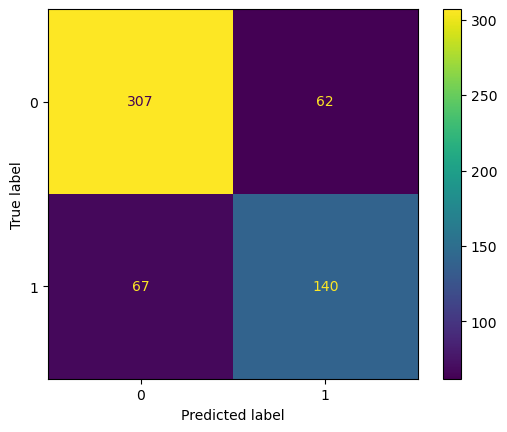

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)